# TP II - Machine Learning
## Convolutional Neural Networks and Transfer Learning

Marcos Antônio Alves

Programa de Pós-Graduação em Engenharia Elétrica - PPGEE

Matrícula: 2018753490

**Context:** Many applications using CNN and transfer learning to multiclass classification problem have been used. **Goal:** The aim of this assignment, as a partial requirement do ML course in DCC/UFMG, is to use CNN and transfer learning by comparing the categorical cross-entropy loss function and accuracy metric in CIFAR-10 dataset. **Methodology:** Different optimizers have been employed, as Adamax, SGD, RMSprop and others (based on gradient descendent approach), to minimize the loss. As required, the data were split into A (1 to 8) and B (9 and 0) parts and applied to train A data. After that, three strategies were used: without transfer learning, fine tuning in 1 layer and fine tuning in 2 layers. **Results:** The best optimizer was Adamax (learning rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6). To the strategies, I'd to employed tests with and without a simple data augmentation (by inverting the image). The later brought the validation accuracy was 0.9375, 0.9145 and 0.9495 to the aforementioned strategies, respectively. The former, the validation accuracy was 0.5310, 0.6453 and 0.715. **Conclusions:** Different optimizers can bring different results, as well as the adjust in their hyper-parameters. The data augmentation as applied did not improve the results, even though increase a little the computational time-consuming. It is concluded that CNN and transfer learning can be used successfully in this type of task, which is multiclass classification problem. **Final considerations:** The assignment works well and it was good to understand the concepts of the ML class.

# Libraries

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
from IPython.display import Markdown

from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from keras import datasets
from keras import layers
from keras import optimizers
from keras import models
from keras.datasets import cifar10

# Tira os warning do TF
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

def printmd(s):
    display(Markdown(s))

Using TensorFlow backend.


In [ ]:
# Variables
BATCH_SIZE = 128
NUM_EPOCHS = 20
VERBOSE = 2


# Dataset

The dataset used was the public CIFAR-10. It consists in a dataset with 60.000 imagens of 32x32 pixels size, being 50.000 of them used to train and 10.000 to test.

As a images classification problem, each image contains an associated target, which is the number of the its class (among 0 and 9).

As required, the classes used were:
A: 1 until 8
B: 0 and 9.

In [ ]:
# Load the imagens splited in train and test.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Add a dimension to color chanel
img_shape = x_train.shape[1:]

# Data preparation

## Splitting the dataset

### A part - Train

In [ ]:
indice_treino = np.where((y_train != 0) & (y_train != 9))[0]
x_treinoA = x_train[indice_treino]
y_treinoA = y_train[indice_treino]
y_treinoA = y_treinoA.reshape(y_treinoA.shape[0])
# print(x_treinoA.shape)
# print(y_treinoA[0:26])

In [ ]:
print("Number of training examples = %i" % x_treinoA.shape[0])
print("Dimension of images = {:d} x {:d} x {:d} ".format(x_treinoA[1].shape[0],
                                                         x_treinoA[1].shape[1],
                                                         x_treinoA[1].shape[2]))
print("Examples = ")
print(y_treinoA[0:20])

Number of training examples = 40000
Dimension of images = 32 x 32 x 3 
Examples = 
[6 4 1 1 2 7 8 3 4 7 7 2 3 2 6 4 3 6 6 2]


The labels are: 


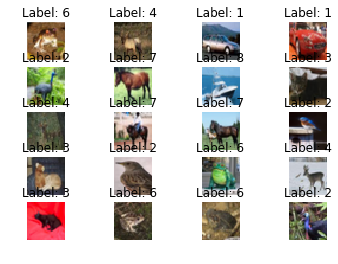

In [ ]:
#This line will allow us to see some examples of each specific class in the data
unique, count= np.unique(y_treinoA, return_counts=True)
print("The labels are: ")

images_and_labels = list(zip(x_treinoA,  y_treinoA))


for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label )

### A part - Test

In [ ]:
indice_teste = np.where((y_test != 0) & (y_test != 9))[0]
x_testeA = x_test[indice_teste]
y_testeA = y_test[indice_teste]
y_testeA = y_testeA.reshape(y_testeA.shape[0])
# print(x_testeA.shape)
# print(y_testeA[0:20])

In [ ]:
print("Number of training examples = %i" % x_testeA.shape[0])
print("Dimension of images = {:d} x {:d} x {:d} ".format(x_testeA[1].shape[0],
                                                         x_testeA[1].shape[1],
                                                         x_testeA[1].shape[2]))
print("Examples = ")
print(y_testeA[0:20])

Number of training examples = 8000
Dimension of images = 32 x 32 x 3 
Examples = 
[3 8 8 6 6 1 6 3 1 5 7 8 5 7 8 6 7 4 5 2]


The labels are: 
1 (automobile), 2 (bird), 3 (cat), 4 (deer), 5 (dog), 6 (frog), 7 (horse), 8 (ship) 


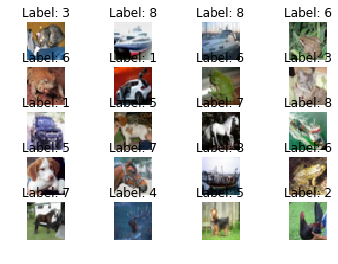

In [ ]:
# Plotting the examples
unique, count= np.unique(y_testeA, return_counts=True)
print("The labels are: ")
print("1 (automobile), 2 (bird), 3 (cat), 4 (deer), 5 (dog), 6 (frog), 7 (horse), 8 (ship) ")

images_and_labels = list(zip(x_testeA,  y_testeA))


for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label )

### B part - Train

In [ ]:
#Final da matrícula: 90.

indice_treino = np.where((y_train == 0) | (y_train == 9))[0]
x_treinoB = x_train[indice_treino]
y_treinoB = y_train[indice_treino]
y_treinoB = y_treinoB.reshape(y_treinoB.shape[0])
# print(x_treinoB.shape)
# print(y_treinoB[0:20])

In [ ]:
print("Number of training examples = %i" % x_treinoB.shape[0])
print("Dimension of images = {:d} x {:d} x {:d} ".format(x_treinoB[1].shape[0],
                                                         x_treinoB[1].shape[1],
                                                         x_treinoB[1].shape[2]))
print("Examples = ")
print(y_treinoB[0:20])

Number of training examples = 10000
Dimension of images = 32 x 32 x 3 
Examples = 
[9 9 9 9 9 0 0 9 0 0 9 9 9 9 9 0 9 0 9 9]


The labels are 9 (truck) and 0 (airplane): 


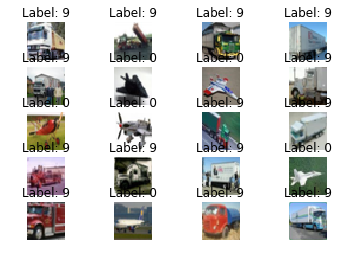

In [ ]:
# Plotting the examples
unique, count= np.unique(y_treinoB, return_counts=True)
print("The labels are 9 (truck) and 0 (airplane): ")

images_and_labels = list(zip(x_treinoB,  y_treinoB))


for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label )

### B part - Test

In [ ]:
indice_teste = np.where((y_test == 0) | (y_test == 9))[0]
x_testeB = x_test[indice_teste]
y_testeB = y_test[indice_teste]
y_testeB = y_testeB.reshape(y_testeB.shape[0])
# print(x_testeB.shape)
# print(y_testeB[0:20])

In [ ]:
print("Number of training examples = %i" % x_testeB.shape[0])
print("Dimension of images = {:d} x {:d} x {:d} ".format(x_testeB[1].shape[0],
                                                         x_testeB[1].shape[1],
                                                         x_testeB[1].shape[2]))
print("Examples = ")
print(y_testeB[0:20])

Number of training examples = 2000
Dimension of images = 32 x 32 x 3 
Examples = 
[0 0 9 9 0 9 0 9 9 9 0 9 9 9 0 0 9 9 0 0]


The labels are: 


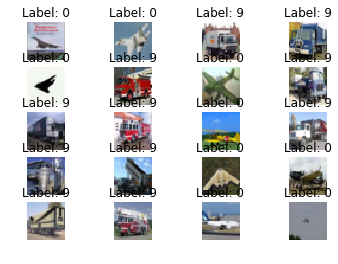

In [ ]:
# Plotting the examples
unique, count= np.unique(y_testeB, return_counts=True)
print("The labels are: ")

images_and_labels = list(zip(x_testeB,  y_testeB))


for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label )

# Preprocessing

In [ ]:
# Normalization the pixel intensity to an [0, 1] interval.

x_treinoA = x_treinoA.astype('float32')/255
x_testeA = x_testeA.astype('float32')/255

x_treinoB = x_treinoB.astype('float32')/255
x_testeB = x_testeB.astype('float32')/255

In [ ]:
# One-hot encoding dos targets
# Converted categorical into binary.
y_treinoA = pd.get_dummies(y_treinoA).values
y_testeA = pd.get_dummies(y_testeA).values

y_treinoB = pd.get_dummies(y_treinoB).values
y_testeB = pd.get_dummies(y_testeB).values

# Capture the number of classes
n_classes = y_treinoA.shape[1]

# Model


In [ ]:
img_shape = (32,32,3)

In [ ]:
# API funcional
#model_input = layers.Input(shape=img_shape, name="Input")

# Parte de extração de features: convolução e pooling
#x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", name="Conv1")(model_input)
#x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", name="Conv2")(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), name="Pool1")(x)
#x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same", name="Conv3")(x)
#x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same", name="Conv4")(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), name="Pool2")(x)
# Camada que "achata" para depois usar em camadas fully connected
#x = layers.Flatten(name="Flatten")(x)

# Camada fully connected (aqui chamada de Dense)
#x = layers.Dense(128, activation="relu", name="Dense1")(x)

# Dropout com a probabilide de remover cada neuronio
#x = layers.Dropout(0.5, name="Dropout")(x)

# Ultima camada com ativacao softmax, que tem como saida
# uma probabilidade para cada classe
#model_output = layers.Dense(n_classes, activation='softmax', name="Output")(x)
#model_output = layers.Dense(n_classes, activation='softmax')(x)

#model = models.Model(model_input, model_output)

In [ ]:
## Sequential
modelA = models.Sequential()
# Convolution 1
modelA.add(layers.Conv2D(32, kernel_size=(3, 3), padding="same", name="Conv1", input_shape=img_shape))
modelA.add(layers.Activation("relu"))
# Convolution 2
modelA.add(layers.Conv2D(64, kernel_size=(3, 3), padding="same", name="Conv2"))
modelA.add(layers.Activation("relu"))
# Max Pooling 1
modelA.add(layers.MaxPooling2D(pool_size=(2, 2), name="Pool1"))
# Add a Dropout layer to regularization.
# It was improved the results a little
# 25% of the neurons will be off.
modelA.add(layers.Dropout(0.25))
# Convolution 3
modelA.add(layers.Conv2D(64, kernel_size=(3, 3), padding="same", name="Conv3"))
modelA.add(layers.Activation("relu"))
# Convolution 4
modelA.add(layers.Conv2D(64, kernel_size=(3, 3), padding="same", name="Conv4"))
modelA.add(layers.Activation("relu"))
# Max Pooling 2
modelA.add(layers.MaxPooling2D(pool_size=(2, 2), name="Pool2"))
# regularization - 25% of the neurons will be off
modelA.add(layers.Dropout(0.25))
modelA.add(layers.Flatten(name="Flatten"))
# Fully connected 1
modelA.add(layers.Dense(512, activation="relu", name="Dense1"))
# regularization - 50% of the neurons will be off
modelA.add(layers.Dropout(0.5))
# Fully connected 2
modelA.add(layers.Dense(n_classes, activation='softmax'))

In [ ]:
# Summary of the model
print('Summary of the built model...')

modelA.summary()

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 16, 16, 64

Optimizers

Source: https://keras.io/optimizers/

In [ ]:
#===============================================================================
# Some others optimizers that can be applied. To use them,
# just comment the Adam above and uncomment the preferred one bellow.
#===============================================================================

# Adamax
optimizer = optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6)
# lr=0.002 => loss: 0.1233 - acc: 0.9569 - val_loss: 0.7857 - val_acc: 0.7999
# lr=0.001 => loss: 0.1053 - acc: 0.9626 - val_loss: 0.8184 - val_acc: 0.8029

# Stochastic gradient descent optimizer.
#optimizer = optimizers.SGD(lr=0.0001, clipnorm=1.0, clipvalue=0.5, momentum=0.0, decay=0.0, nesterov=False)
#loss: 0.6677 - acc: 0.7620 - val_loss: 0.7239 - val_acc: 0.7435

# RMSProp optimizer.
#optimizer = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)
# loss: 0.4855 - acc: 0.8305 - val_loss: 0.6624 - val_acc: 0.7736

# Adagrad
#optimizer = optimizers.Adagrad(lr=0.0001, epsilon=None, decay=0.0)
#loss: 0.4207 - acc: 0.8521 - val_loss: 0.6382 - val_acc: 0.7808

# Adadelta
#optimizer = optimizers.Adadelta(lr=0.5, rho=0.95, epsilon=None, decay=0.0)
#loss: 0.2492 - acc: 0.9127 - val_loss: 0.6807 - val_acc: 0.7905

#Adam é uma variação do SGD
#optimizer = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#loss: 0.7070 - acc: 0.7496 - val_loss: 0.7386 - val_acc: 0.7341

# Nadam
#optimizer = optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
#schedule_decay=0.004 => loss: 0.2210 - acc: 0.9238 - val_loss: 0.7527 - val_acc: 0.7994
#schedule_decay=1e-6 => loss: 0.0957 - acc: 0.9669 - val_loss: 0.8451 - val_acc: 0.8137

In [ ]:
# Run the model and set the loss function and accuracy metric
modelA.compile(optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Train for 20 epochs
historyA = modelA.fit(x_treinoA, y_treinoA,
                      batch_size = BATCH_SIZE,
                      epochs = NUM_EPOCHS,
                      verbose = VERBOSE,
                      validation_data = (x_testeA, y_testeA),
                      shuffle = True)

Train on 40000 samples, validate on 8000 samples
Epoch 1/20
 - 9s - loss: 1.5725 - acc: 0.4106 - val_loss: 1.3190 - val_acc: 0.5200
Epoch 2/20
 - 5s - loss: 1.2506 - acc: 0.5393 - val_loss: 1.1413 - val_acc: 0.5800
Epoch 3/20
 - 5s - loss: 1.1124 - acc: 0.5944 - val_loss: 1.0205 - val_acc: 0.6261
Epoch 4/20
 - 5s - loss: 1.0183 - acc: 0.6290 - val_loss: 0.9187 - val_acc: 0.6676
Epoch 5/20
 - 5s - loss: 0.9330 - acc: 0.6644 - val_loss: 0.8822 - val_acc: 0.6770
Epoch 6/20
 - 6s - loss: 0.8676 - acc: 0.6860 - val_loss: 0.8118 - val_acc: 0.7027
Epoch 7/20
 - 6s - loss: 0.8107 - acc: 0.7109 - val_loss: 0.8108 - val_acc: 0.7081
Epoch 8/20
 - 6s - loss: 0.7669 - acc: 0.7266 - val_loss: 0.7558 - val_acc: 0.7252
Epoch 9/20
 - 6s - loss: 0.7186 - acc: 0.7428 - val_loss: 0.7156 - val_acc: 0.7415
Epoch 10/20
 - 6s - loss: 0.6765 - acc: 0.7595 - val_loss: 0.6975 - val_acc: 0.7500
Epoch 11/20
 - 6s - loss: 0.6382 - acc: 0.7731 - val_loss: 0.6803 - val_acc: 0.7576
Epoch 12/20
 - 6s - loss: 0.6054 - a

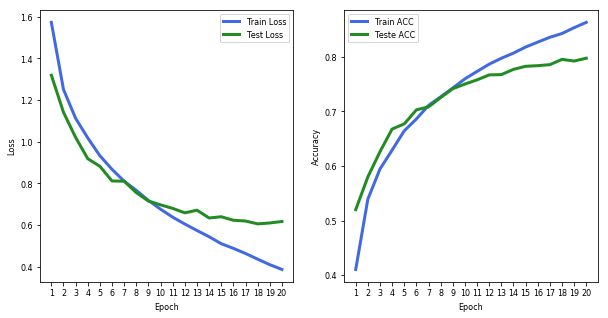

In [ ]:
# Plot the results
mpl.rc("font", **{"size": 8})
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Loss
axes[0].plot(range(1, len(historyA.history["loss"])+1), historyA.history["loss"],
        label="Train Loss", color="royalblue", lw=3)
axes[0].plot(range(1, len(historyA.history["val_loss"])+1), historyA.history["val_loss"],
        label="Test Loss", color="forestgreen", lw=3)
axes[0].set_ylabel("Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_xticks(range(1, len(historyA.history["acc"])+1))
axes[0].legend()

# Accuracy
axes[1].plot(range(1, len(historyA.history["acc"])+1), historyA.history["acc"],
        label="Train ACC", color="royalblue", lw=3)
axes[1].plot(range(1, len(historyA.history["val_acc"])+1), historyA.history["val_acc"],
        label="Teste ACC", color="forestgreen", lw=3)
axes[1].set_ylabel("Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_xticks(range(1, len(historyA.history["acc"])+1))
axes[1].legend()
plt.show()

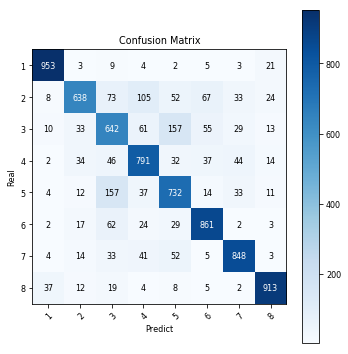

In [ ]:
# Confusion Matrix
# It is a performance measurement where output can be two or more classes
# and they are plotted against each other.

# Predictions
y_proba = modelA.predict(x_testeA)
y_pred = np.argmax(y_proba, axis=1)

# Labels (desfaz o one-hot encode)
y_true = np.argmax(y_testeA, axis=1)

cm = metrics.confusion_matrix(y_true, y_pred)
classes = list(range(1, 11))
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title="Confusion Matrix",
       ylabel="Real",
       xlabel="Predict")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], "d"),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2. else "black")
fig.tight_layout()
plt.show()

Most of the errors were among the classes 2 and 4 (bird and deer), 3 and 5 (cat and dog) and 5 and 3 (dog and cat) to real vs predict, respectively. The former, some birds are in trees and maybe the algorithm understand similarities with the deer horn. Cat and dogs have somethings in common, like earings, walk on fours and are covered in hair.

In [ ]:
# Creating the model
modelA.save_weights('weights_saved.h5')
modelA.save('modelA.h5')

### Without transfer learning

In [ ]:
n_classes = 2

modelB = models.Sequential()
modelB.add(layers.Conv2D(32, kernel_size=(3, 3), padding="same", name="Conv1", input_shape=img_shape))
modelB.add(layers.Activation("relu"))
modelB.add(layers.Conv2D(64, kernel_size=(3, 3), padding="same", name="Conv2"))
modelB.add(layers.Activation("relu"))
modelB.add(layers.MaxPooling2D(pool_size=(2, 2), name="Pool1"))

# Add a Dropout layer.
# It was improved the results a little
# 25% of the neurons will be off.
modelB.add(layers.Dropout(0.25))
modelB.add(layers.Conv2D(64, kernel_size=(3, 3), padding="same", name="Conv3"))
modelB.add(layers.Activation("relu"))
modelB.add(layers.Conv2D(64, kernel_size=(3, 3), padding="same", name="Conv4"))
modelB.add(layers.Activation("relu"))
modelB.add(layers.MaxPooling2D(pool_size=(2, 2), name="Pool2"))

# 25% of the neurons will be off.
modelB.add(layers.Dropout(0.25))
modelB.add(layers.Flatten(name="Flatten"))
modelB.add(layers.Dense(512, activation="relu", name="Dense1"))

modelB.add(layers.Dropout(0.5))
modelB.add(layers.Dense(n_classes, activation='softmax'))

In [ ]:
# Summary of the model
print('Summary of the built model...')

modelB.summary()

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 16, 16, 64

In [ ]:
# Run the B model and set the loss function and accuracy metric
modelB.compile(optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

**Implement data augmentation**

Depending of the augmenting,  the images should makes the model more robust and generalizable by using unseen data in the test set  (Moghazy, 2019).


In [ ]:
# # Used ImageDataGenerator from keras to augment the images.
# x_treinoB = x_treinoB.reshape(-1,32,32,3)
# x_testeB = x_testeB.reshape(-1,32,32,3)

# from keras.preprocessing.image import ImageDataGenerator
# x_treinoB2 = np.array(x_treinoB, copy=True)
# y_treinoB2 = np.array(y_treinoB, copy=True)

# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     )

# datagen.fit(x_treinoB)

# # print(type(x_treinoB2))
# # print(type(x_treinoB))

In [ ]:
# # Concatenating the old data with the augmented data
# result_x  = np.concatenate((x_treinoB, x_treinoB2), axis=0)
# result_y  = np.concatenate((y_treinoB, y_treinoB2), axis=0)

In [ ]:
# # Plotting the examples
# unique, count= np.unique(y_treinoB, return_counts=True)
# print("The labels are: ")

# images_and_labels = list(zip(result_x,  result_y))


# for index, (image, label) in enumerate(images_and_labels[:20]):
#     plt.subplot(5, 4, index + 1)
#     plt.axis('off')
#     plt.imshow(image.squeeze(), cmap=plt.cm.gray_r, interpolation='nearest')
# #     plt.title('Label: %i' % label )

In [ ]:
# # Concatenating the old data with the augmented data
# result_x  = np.concatenate((x_treinoB, x_treinoB2), axis=0)
# result_y  = np.concatenate((y_treinoB, y_treinoB2), axis=0)

In [ ]:
# historyB_withDataAug = modelB.fit_generator(datagen.flow(result_x, result_y, batch_size=BATCH_SIZE),
#                                 steps_per_epoch=len(x_treinoB)/32 ,
#                                 epochs = NUM_EPOCHS,
#                                 validation_data = (x_testeB, y_testeB),
#                                 shuffle = True)

Without data augmentation

In [ ]:
# Train for 20 epochs
historyB = modelB.fit(x_treinoB, y_treinoB,
                      batch_size = BATCH_SIZE,
                      epochs = NUM_EPOCHS,
                      verbose = VERBOSE,
                      validation_data = (x_testeB, y_testeB),
                      shuffle = True)

Train on 10000 samples, validate on 2000 samples
Epoch 1/20
 - 2s - loss: 0.4982 - acc: 0.7529 - val_loss: 0.4266 - val_acc: 0.8020
Epoch 2/20
 - 1s - loss: 0.3595 - acc: 0.8433 - val_loss: 0.3201 - val_acc: 0.8655
Epoch 3/20
 - 1s - loss: 0.3163 - acc: 0.8660 - val_loss: 0.2828 - val_acc: 0.8850
Epoch 4/20
 - 1s - loss: 0.2863 - acc: 0.8785 - val_loss: 0.2750 - val_acc: 0.8860
Epoch 5/20
 - 1s - loss: 0.2478 - acc: 0.8971 - val_loss: 0.2241 - val_acc: 0.9085
Epoch 6/20
 - 1s - loss: 0.2128 - acc: 0.9141 - val_loss: 0.2178 - val_acc: 0.9145
Epoch 7/20
 - 1s - loss: 0.1998 - acc: 0.9214 - val_loss: 0.1973 - val_acc: 0.9195
Epoch 8/20
 - 1s - loss: 0.1841 - acc: 0.9292 - val_loss: 0.1742 - val_acc: 0.9295
Epoch 9/20
 - 1s - loss: 0.1637 - acc: 0.9360 - val_loss: 0.1676 - val_acc: 0.9285
Epoch 10/20
 - 1s - loss: 0.1541 - acc: 0.9411 - val_loss: 0.1961 - val_acc: 0.9185
Epoch 11/20
 - 1s - loss: 0.1505 - acc: 0.9424 - val_loss: 0.1726 - val_acc: 0.9335
Epoch 12/20
 - 1s - loss: 0.1388 - a

Plot the model results

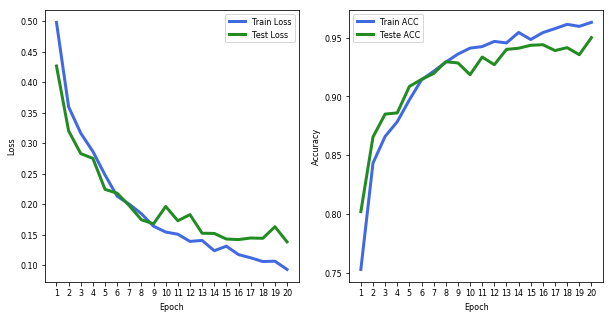

In [ ]:
# Plot the results
mpl.rc("font", **{"size": 8})
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Loss
axes[0].plot(range(1, len(historyB.history["loss"])+1), historyB.history["loss"],
        label="Train Loss", color="royalblue", lw=3)
axes[0].plot(range(1, len(historyB.history["val_loss"])+1), historyB.history["val_loss"],
        label="Test Loss", color="forestgreen", lw=3)

axes[0].set_ylabel("Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_xticks(range(1, len(historyB.history["acc"])+1))
axes[0].legend()

# Accuracy
axes[1].plot(range(1, len(historyB.history["acc"])+1), historyB.history["acc"],
        label="Train ACC", color="royalblue", lw=3)
axes[1].plot(range(1, len(historyB.history["val_acc"])+1), historyB.history["val_acc"],
        label="Teste ACC", color="forestgreen", lw=3)
axes[1].set_ylabel("Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_xticks(range(1, len(historyB.history["acc"])+1))
axes[1].legend()
plt.show()

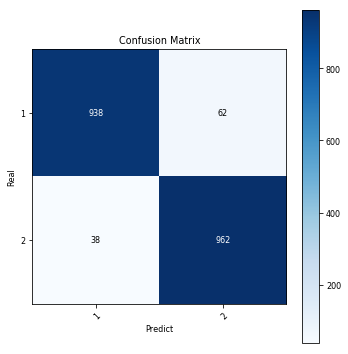

In [ ]:
# Confusion Matrix

# Predictions
y_proba = modelB.predict(x_testeB)
y_pred = np.argmax(y_proba, axis=1)

# Labels (desfaz o one-hot encode)
y_true = np.argmax(y_testeB, axis=1)

cm = metrics.confusion_matrix(y_true, y_pred)
classes = list(range(1, 11))
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title="Confusion Matrix",
       ylabel="Real",
       xlabel="Predict")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], "d"),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2. else "black")
fig.tight_layout()
plt.show()

### Fine tuning in the last fully connected layer

In [ ]:
# Represents the number of class labels for our classification task
num_class = 2
# Load the pre-trained model.
modelC = models.load_model('modelA.h5')
# Load the pre-trained weight to the model.
modelC.load_weights('weights_saved.h5')

In [ ]:
#Fix warning: https://stackoverflow.com/questions/49195189/error-loading-the-saved-optimizer-keras-python-raspberry

In [ ]:
modelC.pop()
modelC.outputs = [modelC.layers[-1].output]
modelC.layers[-1].outbound_nodes = []
modelC.add(layers.Dense(2, activation='softmax'))

In [ ]:
#Sometimes, we want to freeze the weight for the first few layers
#so that they remain intact throughout the fine-tuning process.

# Choose the layers which are updated by training
# Freeze the weights for the first 15 layers
for layer in modelC.layers[:15]:
    layer.trainable = False

In [ ]:
# Run the B model and set the loss function and accuracy metric
modelC.compile(optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Summary of the model
print('Summary of the built model...')

modelC.summary()

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 16, 16, 64

With data augmentation


In [ ]:
# historyC_withDataAug = modelC.fit_generator(datagen.flow(result_x, result_y, batch_size=BATCH_SIZE),
#                                 steps_per_epoch=len(x_treinoB)/32 ,
#                                 epochs = NUM_EPOCHS,
#                                 validation_data = (x_testeB, y_testeB),
#                                 shuffle = True)

Without data augmentation

In [ ]:
# Train for 20 epochs
historyC = modelC.fit(x_treinoB, y_treinoB,
                      batch_size = BATCH_SIZE,
                      epochs = NUM_EPOCHS,
                      verbose = VERBOSE,
                      validation_data = (x_testeB, y_testeB),
                      shuffle = True)

Train on 10000 samples, validate on 2000 samples
Epoch 1/20
 - 1s - loss: 0.6412 - acc: 0.6891 - val_loss: 0.3377 - val_acc: 0.8555
Epoch 2/20
 - 1s - loss: 0.4215 - acc: 0.8123 - val_loss: 0.2919 - val_acc: 0.8705
Epoch 3/20
 - 1s - loss: 0.3717 - acc: 0.8421 - val_loss: 0.2722 - val_acc: 0.8780
Epoch 4/20
 - 1s - loss: 0.3435 - acc: 0.8547 - val_loss: 0.2598 - val_acc: 0.8825
Epoch 5/20
 - 1s - loss: 0.3256 - acc: 0.8637 - val_loss: 0.2517 - val_acc: 0.8885
Epoch 6/20
 - 1s - loss: 0.3051 - acc: 0.8700 - val_loss: 0.2452 - val_acc: 0.8930
Epoch 7/20
 - 1s - loss: 0.3037 - acc: 0.8716 - val_loss: 0.2408 - val_acc: 0.8955
Epoch 8/20
 - 1s - loss: 0.2936 - acc: 0.8774 - val_loss: 0.2376 - val_acc: 0.9000
Epoch 9/20
 - 1s - loss: 0.2846 - acc: 0.8804 - val_loss: 0.2347 - val_acc: 0.9025
Epoch 10/20
 - 1s - loss: 0.2782 - acc: 0.8834 - val_loss: 0.2326 - val_acc: 0.9035
Epoch 11/20
 - 1s - loss: 0.2725 - acc: 0.8876 - val_loss: 0.2301 - val_acc: 0.9035
Epoch 12/20
 - 1s - loss: 0.2716 - a

Plot the model results

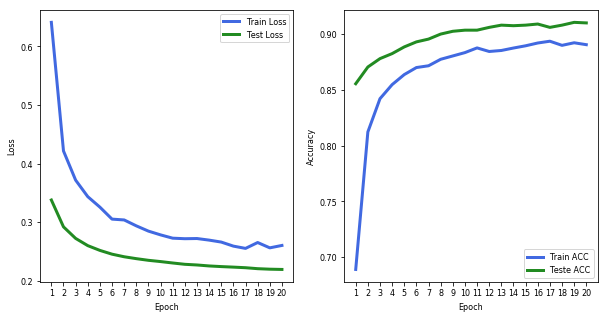

In [ ]:
mpl.rc("font", **{"size": 8})
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Loss
axes[0].plot(range(1, len(historyC.history["loss"])+1), historyC.history["loss"],
        label="Train Loss", color="royalblue", lw=3)
axes[0].plot(range(1, len(historyC.history["val_loss"])+1), historyC.history["val_loss"],
        label="Test Loss", color="forestgreen", lw=3)
axes[0].set_ylabel("Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_xticks(range(1, len(historyC.history["acc"])+1))
axes[0].legend()

# Accuracy
axes[1].plot(range(1, len(historyC.history["acc"])+1), historyC.history["acc"],
        label="Train ACC", color="royalblue", lw=3)

axes[1].plot(range(1, len(historyC.history["val_acc"])+1), historyC.history["val_acc"],
        label="Teste ACC", color="forestgreen", lw=3)
axes[1].set_ylabel("Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_xticks(range(1, len(historyC.history["acc"])+1))
axes[1].legend()
plt.show()

Confusion matrix

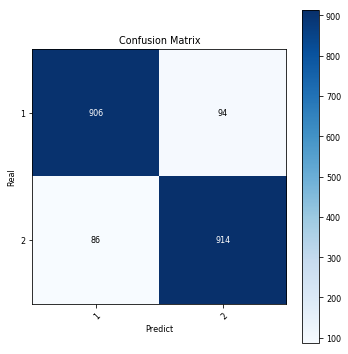

In [ ]:
# Predictions
y_proba = modelC.predict(x_testeB)
y_pred = np.argmax(y_proba, axis=1)

# Labels (desfaz o one-hot encode)
y_true = np.argmax(y_testeB, axis=1)

cm = metrics.confusion_matrix(y_true, y_pred)
classes = list(range(1, 11))
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title="Confusion Matrix",
       ylabel="Real",
       xlabel="Predict")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], "d"),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2. else "black")
fig.tight_layout()
plt.show()

### Fine tunning in both fully connected layers


In [ ]:
modelD = models.load_model('modelA.h5')
modelD.load_weights('weights_saved.h5')

In [ ]:
# Summary of the model
print('Summary of the built model...')

modelD.summary()

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 16, 16, 64

In [ ]:
# Remove the last 2 FC layers.
modelD.pop()
modelD.pop()
modelD.pop()
modelD.outputs = [modelD.layers[-1].output]
modelD.layers[-1].outbound_nodes = []
modelD.add(layers.Dense(512, activation="relu", name="Dense1"))
modelD.add(layers.Dropout(0.5))
modelD.add(layers.Dense(2, activation='softmax'))

In [ ]:
# Summary of the model
print('Summary of the built model...')

modelD.summary()

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 16, 16, 64

In [ ]:
#Sometimes, we want to freeze the weight for the first few layers
#so that they remain intact throughout the fine-tuning process.

# Choose the layers which are updated by training
# Freeze the weights for the first 15 layers
for layer in modelD.layers[:13]:
    layer.trainable = False

In [ ]:
# Run the D model and set the loss function and accuracy metric
modelD.compile(optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

With data augmentation

In [ ]:
# historyD_withDataAug = modelD.fit_generator(datagen.flow(result_x, result_y, batch_size=BATCH_SIZE),
#                                 steps_per_epoch=len(x_treinoB)/32 ,
#                                 epochs = NUM_EPOCHS,
#                                 validation_data = (x_testeB, y_testeB), shuffle = True)

Without data augmentation

In [ ]:
# To run, just uncomment this cel.
historyD = modelD.fit(x_treinoB, y_treinoB,
                      batch_size = BATCH_SIZE,
                      epochs = NUM_EPOCHS,
                      verbose = VERBOSE,
                      validation_data = (x_testeB, y_testeB),
                      shuffle = True)

Train on 10000 samples, validate on 2000 samples
Epoch 1/20
 - 1s - loss: 0.2595 - acc: 0.8932 - val_loss: 0.1726 - val_acc: 0.9230
Epoch 2/20
 - 1s - loss: 0.1559 - acc: 0.9381 - val_loss: 0.1558 - val_acc: 0.9370
Epoch 3/20
 - 1s - loss: 0.1308 - acc: 0.9507 - val_loss: 0.1463 - val_acc: 0.9400
Epoch 4/20
 - 1s - loss: 0.1121 - acc: 0.9578 - val_loss: 0.1445 - val_acc: 0.9375
Epoch 5/20
 - 1s - loss: 0.0994 - acc: 0.9644 - val_loss: 0.1405 - val_acc: 0.9420
Epoch 6/20
 - 1s - loss: 0.0840 - acc: 0.9679 - val_loss: 0.1359 - val_acc: 0.9450
Epoch 7/20
 - 1s - loss: 0.0762 - acc: 0.9710 - val_loss: 0.1352 - val_acc: 0.9450
Epoch 8/20
 - 1s - loss: 0.0678 - acc: 0.9747 - val_loss: 0.1381 - val_acc: 0.9460
Epoch 9/20
 - 1s - loss: 0.0601 - acc: 0.9785 - val_loss: 0.1317 - val_acc: 0.9510
Epoch 10/20
 - 1s - loss: 0.0548 - acc: 0.9806 - val_loss: 0.1311 - val_acc: 0.9500
Epoch 11/20
 - 1s - loss: 0.0457 - acc: 0.9839 - val_loss: 0.1359 - val_acc: 0.9500
Epoch 12/20
 - 1s - loss: 0.0449 - a

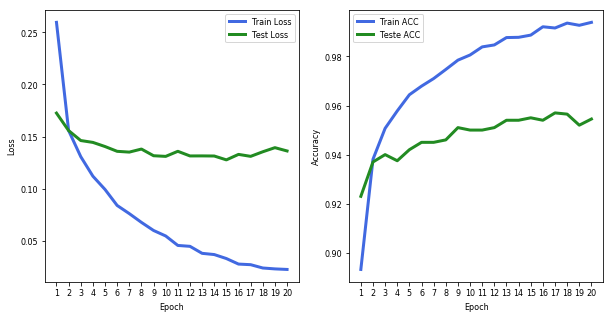

In [ ]:
# Plot the results
mpl.rc("font", **{"size": 8})
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Loss
axes[0].plot(range(1, len(historyD.history["loss"])+1), historyD.history["loss"],
        label="Train Loss", color="royalblue", lw=3)
axes[0].plot(range(1, len(historyD.history["val_loss"])+1), historyD.history["val_loss"],
        label="Test Loss", color="forestgreen", lw=3)
axes[0].set_ylabel("Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_xticks(range(1, len(historyD.history["acc"])+1))
axes[0].legend()

# Accuracy
axes[1].plot(range(1, len(historyD.history["acc"])+1), historyD.history["acc"],
        label="Train ACC", color="royalblue", lw=3)
axes[1].plot(range(1, len(historyD.history["val_acc"])+1), historyD.history["val_acc"],
        label="Teste ACC", color="forestgreen", lw=3)
axes[1].set_ylabel("Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_xticks(range(1, len(historyD.history["acc"])+1))
axes[1].legend()
plt.show()

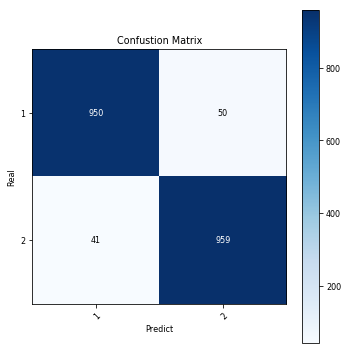

In [ ]:
# Confusion Matrix

# Predictions
y_proba = modelD.predict(x_testeB)
y_pred = np.argmax(y_proba, axis=1)

# Labels (desfaz o one-hot encode)
y_true = np.argmax(y_testeB, axis=1)

cm = metrics.confusion_matrix(y_true, y_pred)
classes = list(range(1, 11))
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title="Confustion Matrix",
       ylabel="Real",
       xlabel="Predict")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], "d"),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2. else "black")
fig.tight_layout()
plt.show()

## Summary of the results

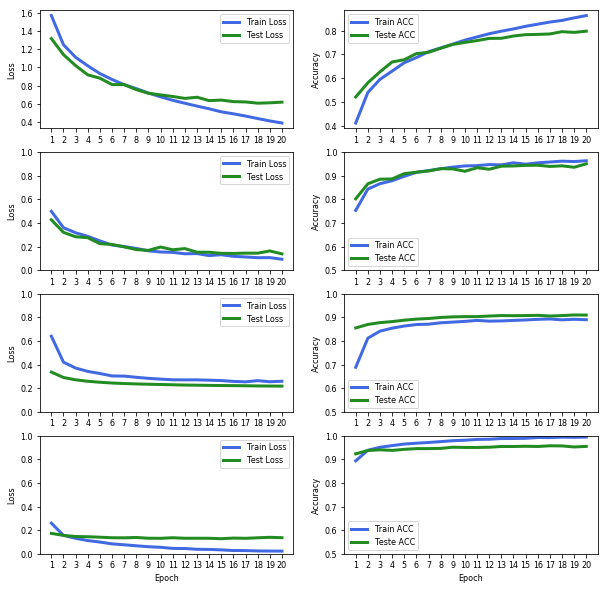

In [ ]:
#More results

mpl.rc("font", **{"size": 8})
fig, axes = plt.subplots(4, 2, figsize=(10, 10))

# Loss
axes[0,0].plot(range(1, len(historyA.history["loss"])+1), historyA.history["loss"],
        label="Train Loss", color="royalblue", lw=3)
axes[0,0].plot(range(1, len(historyA.history["val_loss"])+1), historyA.history["val_loss"],
        label="Test Loss", color="forestgreen", lw=3)
axes[0,0].set_ylabel("Loss")
#axes[0,0].set_ylim([0.0,1.0])
#axes[0,0].set_xlabel("Epoch")
axes[0,0].set_xticks(range(1, len(historyA.history["acc"])+1))
axes[0,0].legend()

axes[1,0].plot(range(1, len(historyB.history["loss"])+1), historyB.history["loss"],
        label="Train Loss", color="royalblue", lw=3)
axes[1,0].plot(range(1, len(historyB.history["val_loss"])+1), historyB.history["val_loss"],
        label="Test Loss", color="forestgreen", lw=3)
axes[1,0].set_ylabel("Loss")
axes[1,0].set_ylim([0.0,1.0])
#axes[1,0].set_xlabel("Epoch")
axes[1,0].set_xticks(range(1, len(historyB.history["acc"])+1))
axes[1,0].legend()

axes[2,0].plot(range(1, len(historyC.history["loss"])+1), historyC.history["loss"],
        label="Train Loss", color="royalblue", lw=3)
axes[2,0].plot(range(1, len(historyC.history["val_loss"])+1), historyC.history["val_loss"],
        label="Test Loss", color="forestgreen", lw=3)
axes[2,0].set_ylabel("Loss")
axes[2,0].set_ylim([0.0,1.0])
#axes[2,0].set_xlabel("Epoch")
axes[2,0].set_xticks(range(1, len(historyC.history["acc"])+1))
axes[2,0].legend()

axes[3,0].plot(range(1, len(historyD.history["loss"])+1), historyD.history["loss"],
        label="Train Loss", color="royalblue", lw=3)
axes[3,0].plot(range(1, len(historyD.history["val_loss"])+1), historyD.history["val_loss"],
        label="Test Loss", color="forestgreen", lw=3)
axes[3,0].set_ylabel("Loss")
axes[3,0].set_ylim([0.0,1.0])
axes[3,0].set_xlabel("Epoch")
axes[3,0].set_xticks(range(1, len(historyD.history["acc"])+1))
axes[3,0].legend()

# Accuracy
axes[0,1].plot(range(1, len(historyA.history["acc"])+1), historyA.history["acc"],
        label="Train ACC", color="royalblue", lw=3)
axes[0,1].plot(range(1, len(historyA.history["val_acc"])+1), historyA.history["val_acc"],
        label="Teste ACC", color="forestgreen", lw=3)
axes[0,1].set_ylabel("Accuracy")
#axes[0,1].set_ylim([0.5,1.0])
#axes[0,1].set_xlabel("Epoch")
axes[0,1].set_xticks(range(1, len(historyA.history["acc"])+1))
axes[0,1].legend()

axes[1,1].plot(range(1, len(historyB.history["acc"])+1), historyB.history["acc"],
        label="Train ACC", color="royalblue", lw=3)
axes[1,1].plot(range(1, len(historyB.history["val_acc"])+1), historyB.history["val_acc"],
        label="Teste ACC", color="forestgreen", lw=3)
axes[1,1].set_ylabel("Accuracy")
axes[1,1].set_ylim([0.5,1.0])
#axes[1,1].set_xlabel("Epoch")
axes[1,1].set_xticks(range(1, len(historyB.history["acc"])+1))
axes[1,1].legend()

axes[2,1].plot(range(1, len(historyC.history["acc"])+1), historyC.history["acc"],
        label="Train ACC", color="royalblue", lw=3)
axes[2,1].plot(range(1, len(historyC.history["val_acc"])+1), historyC.history["val_acc"],
        label="Teste ACC", color="forestgreen", lw=3)
axes[2,1].set_ylabel("Accuracy")
axes[2,1].set_ylim([0.5,1.0])
#axes[2,1].set_xlabel("Epoch")
axes[2,1].set_xticks(range(1, len(historyC.history["acc"])+1))
axes[2,1].legend()

axes[3,1].plot(range(1, len(historyD.history["acc"])+1), historyD.history["acc"],
        label="Train ACC", color="royalblue", lw=3)
axes[3,1].plot(range(1, len(historyD.history["val_acc"])+1), historyD.history["val_acc"],
        label="Teste ACC", color="forestgreen", lw=3)
axes[3,1].set_ylabel("Accuracy")
axes[3,1].set_ylim([0.5,1.0])
axes[3,1].set_xlabel("Epoch")
axes[3,1].set_xticks(range(1, len(historyD.history["acc"])+1))
axes[3,1].legend()
plt.show()

Regarding the curves above, it is important to realize that the loss was increasing according to the number of epochs. Meanwhile, the test accuracy either is increasing or are stable.

In order to get a true and beautiful visualization, all the graphs were set in equal intervals (Thejesh GN, 2017), it means [0.0 1.0] to a loss per epoch and [0.5 1.0] to accuracy per epoch. The only exception was done to the first one since the loss e val_loss started greater than 1. The explanation is quite simple: we have 8 classes in A. It is hoped for more aleatory values. P = 1/n_classes. For each class = 1/8 = .125. The loss function is cross entropy, so -ln (0.125) = 2,07. Now, with 2 classes in B data, -ln(1/2) = 0,69.

In [ ]:
# # Matriz de Confusao

# # Predições
# y_proba = model.predict(x_testeA)
# y_pred = np.argmax(y_proba, axis=1)

# # Labels (desfaz o one-hot encode)
# y_true = np.argmax(y_testeA, axis=1)

# cm = metrics.confusion_matrix(y_true, y_pred)
# classes = list(range(1, 11))
# fig, ax = plt.subplots(figsize=(7, 7))
# im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# ax.figure.colorbar(im, ax=ax)
# ax.set(xticks=np.arange(cm.shape[1]),
#        yticks=np.arange(cm.shape[0]),
#        xticklabels=classes, yticklabels=classes,
#        title="Matriz de Confusão",
#        ylabel="Real",
#        xlabel="Predito")

# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# for i in range(cm.shape[0]):
#     for j in range(cm.shape[1]):
#         ax.text(j, i, format(cm[i, j], "d"),
#                 ha="center", va="center",
#                 color="white" if cm[i, j] > cm.max()/2. else "black")
# fig.tight_layout()
# plt.show()

### Missclassified

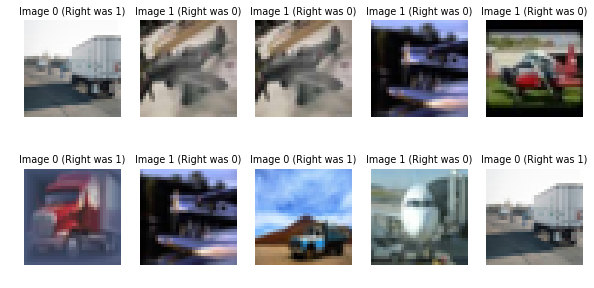

In [ ]:
missed = y_pred != y_true

x_missed = x_testeB[missed]
y_missed = y_pred[missed]
y_true_missed = y_true[missed]

n_rows = 2
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5))

for i in range(n_rows):
    for j in range(n_cols):
        img_i = np.random.randint(0, x_missed.shape[0])
        axes[i][j].imshow(x_missed[img_i, :, :], cmap="gray")
        #axes[i][j].imshow(x_missed[img_i, :, :, 0])
        axes[i][j].set_title("Image {} (Right was {})".format(y_missed[img_i], y_true_missed[img_i]))
        axes[i][j].axis("off")
plt.show()

# Model visualization

### Filters in the 1st layer

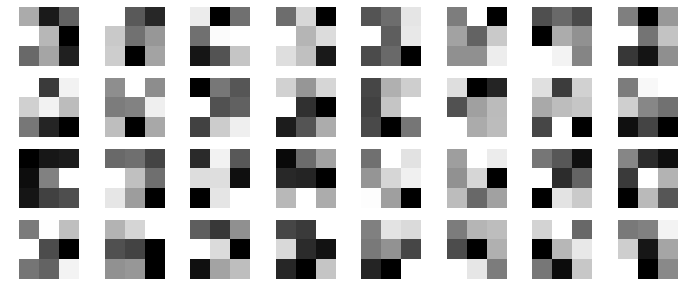

In [ ]:
# Filters in Model A
kernels = modelA.get_layer("Conv1").get_weights()[0]

n_rows = 4
n_cols = 8
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5))

for k in range(kernels.shape[3]):
    i = k//n_cols
    j = k%n_cols
    axes[i][j].imshow(kernels[:, :, 0, k], cmap="gray")
    axes[i][j].axis("off")
plt.show()

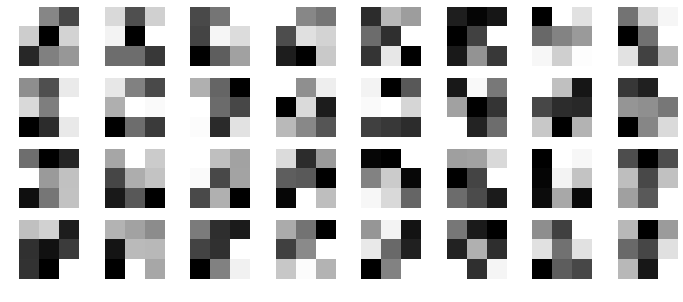

In [ ]:
# Filters in Model B
kernels = modelB.get_layer("Conv1").get_weights()[0]

n_rows = 4
n_cols = 8
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5))

for k in range(kernels.shape[3]):
    i = k//n_cols
    j = k%n_cols
    axes[i][j].imshow(kernels[:, :, 0, k], cmap="gray")
    axes[i][j].axis("off")
plt.show()

# Some conclusions

* More than 20 epochs will be better, since the accuracy of the models were still increasing;
* Setting the hyper-parameters of the optimizers can be improve the results a little (about 1%);
* Different optimizers can bring different accuracy rates;
* Classes were balanced and it was good.
* Some others approaches we can try to get better results:
  * More agressive data augmentation;
  * More aggressive dropout;
  * Use of regularization (or "weight decay");
  * More exploration about the model parameters.

Shortly the accuracy values were:
* Without data augmentation:
  * Without transfer learning: val_acc 0.9375 and val_loss 0.1485
  * Fine tuning 1 layer: val_acc 0.9145 and val_loss 0.2084
  * Fine tunning 2 layers: val_acc 0.9495 and val_loss 0.1418
* With data augmentation:
  * Without transfer learning: val_loss 0.5310
  * Fine tuning 1 layer: val_loss 0.6453
  * Fine tunning 2 layers: val_loss 0.715

# References:

* Arden Dertat. Applied Deep Learning - Part 4: Convolutional Neural Networks. 2017. Available in https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2.  Last access: Jun 20 2019.

* Felix Yu. A Comprehensive guide to Fine-tuning Deep Learning Models in Keras (Part II). 2016. Available in: https://flyyufelix.github.io/2016/10/08/fine-tuning-in-keras-part2.html. Last access: Jun 20 2019.

* VGG16 Fine-tuning model. Available in: http://marubon-ds.blogspot.com/2017/09/vgg16-fine-tuning-model.html. Last access: Jun 20 2019.

* Andrej Karpathy. A Recipe for Training Neural Networks. 2019. Available in: http://karpathy.github.io/2019/04/25/recipe/. Last access: Jun 20 2019.

* CIFAR-10. Available in https://www.cs.toronto.edu/~kriz/cifar.html. Last access: Jun 21 2019.

* Rakshith Vasudev. What is One Hot Encoding? Why And When do you have to use it? Available in: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f. Last access: Jun 21 2019.

* Thejesh GN. 2017. How to Lie with Graphs. Available in https://thejeshgn.com/2017/11/17/how-to-lie-with-graphs/. Last access: Jun 21 2019.

* Moghazy, 2019. Convolutional Neural Networks with Data Augmentation using Keras. Available in https://www.kaggle.com/moghazy/guide-to-cnns-with-data-augmentation-keras. Last access: Jun 22 2019.